In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks
%config InlineBackend.figure_format = 'svg'

# 定义van der Pol oscillator的微分方程
def vdp(t, y, u):
    x, dx_dt = y
    dy_dt = [dx_dt, u * (1 - x**2) * dx_dt - x]
    return dy_dt

# 定义计算周期的函数
def calculate_period(time, signal):
    peaks, _ = find_peaks(signal)
    periods = np.diff(time[peaks])
    avg_period = np.mean(periods)
    return avg_period

# 相空间图绘制
def plot_phase_space(x, dx_dt):
    plt.figure()
    plt.plot(x, dx_dt)
    plt.xlabel('x')
    plt.ylabel('dx/dt')
    plt.title('Phase Space')
    plt.grid(True)
    plt.show()

# 相空间图绘制
def plot_t_x(time, x):
    plt.figure()
    plt.plot(time, x)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('t-x Diagram')
    plt.grid(True)
    plt.show()


#定义解vdp函数并得到极限环
def solvevdp(u, t_start, t_end, num_points, initial_conditions):
    #initial_conditions=[x(0), dx/dt(0)]
    x_list = []
    dx_dt_list = []
    solution = solve_ivp(lambda t, y: vdp(t, y, u),
                     [t_start, t_end],
                     initial_conditions,
                     t_eval=np.linspace(t_start, t_end, num_points))
    
    x = solution.y[0]
    dx_dt = solution.y[1]
    start_index = int(num_points * 0.2)  # 从轨迹的 20% 处开始
    x = x[start_index:]
    dx_dt = dx_dt[start_index:]
    x_list.append(x)
    dx_dt_list.append(dx_dt)

    return x_list, dx_dt_list

Van der Pol oscillator的周期为: 6.6652782340741


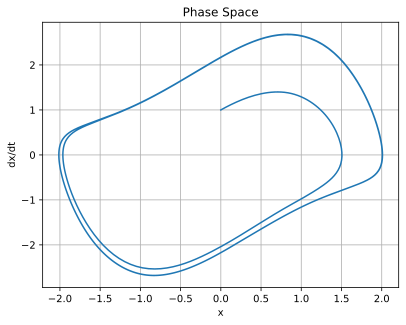

In [2]:
#计算u = 1.0时的周期
initial_conditions = [0, 1]  # x(0), dx/dt(0)
u = 1.0
t_start = 0.0
t_end = 3000.0
num_points = 100000

solution = solve_ivp(lambda t, y: vdp(t, y, u),
                    [t_start, t_end],
                    initial_conditions,
                    t_eval=np.linspace(t_start, t_end, num_points))

time = solution.t
x = solution.y[0]
dx_dt = solution.y[1]

period = calculate_period(time, x)
print("Van der Pol oscillator的周期为:", period)

plot_phase_space(x, dx_dt)



Van der Pol oscillator的周期为: 6.671291657237285


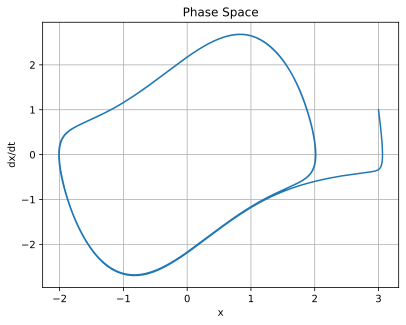

In [3]:
#计算u = 1.0时的周期
initial_conditions = [3, 1]  # x(0), dx/dt(0)
u = 1.0
t_start = 0.0
t_end = 3000.0
num_points = 100000

solution = solve_ivp(lambda t, y: vdp(t, y, u),
                    [t_start, t_end],
                    initial_conditions,
                    t_eval=np.linspace(t_start, t_end, num_points))

time = solution.t
x = solution.y[0]
dx_dt = solution.y[1]

period = calculate_period(time, x)
print("Van der Pol oscillator的周期为:", period)

plot_phase_space(x, dx_dt)

Van der Pol oscillator的周期为: 160.52399385732716


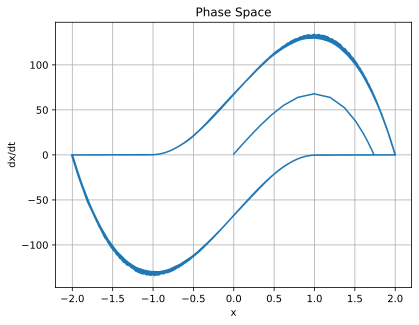

In [4]:
#计算u = 100.0时的周期
initial_conditions = [0, 1] 
u = 100.0
t_start = 0.0
t_end = 3000.0
num_points = 1000000

solution = solve_ivp(lambda t, y: vdp(t, y, u),
                    [t_start, t_end],
                    initial_conditions,
                    t_eval=np.linspace(t_start, t_end, num_points))

time = solution.t
x = solution.y[0]
dx_dt = solution.y[1]

period = calculate_period(time, x)
print("Van der Pol oscillator的周期为:", period)

plot_phase_space(x, dx_dt)

In [5]:
# 绘制μ = 1 to 5的相空间图
fig, ax = plt.subplots()

for μ in range(1, 6):
    x, dx_dt = solvevdp(μ, 0, 3000, 100000, [1.0, 0.0])
    ax.plot(x[0], dx_dt[0], label=f'μ={μ}')

ax.set_title('Phase Space of Van der Pol Oscillator')
ax.set_xlabel('x')
ax.set_ylabel('dx/dt')
ax.legend()
ax.grid(True)
plt.show()


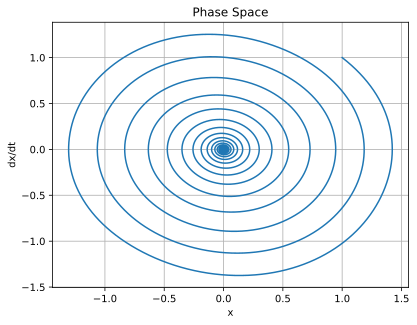

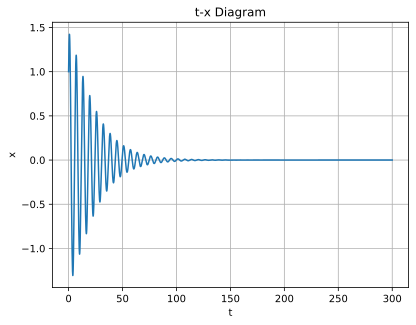

In [6]:
initial_conditions = [1 ,1]  # x(0), dx/dt(0)
u = -0.1
t_start = 0.0
t_end = 300.0
num_points = 1000000

solution = solve_ivp(lambda t, y: vdp(t, y, u),
                    [t_start, t_end],
                    initial_conditions,
                    t_eval=np.linspace(t_start, t_end, num_points))

time = solution.t
x = solution.y[0]
dx_dt = solution.y[1]



plot_phase_space(x , dx_dt)
plot_t_x(time , x)
